In [1]:
# Iniciamos el análisis exploratorio

import pandas as pd

# Cargar el dataset
file_path = r'C:\Users\USUARIO\Downloads\archiveData\Titanic-Dataset.csv'
data = pd.read_csv(file_path)

# Vista general de los datos
print("Primeras filas del dataset:")
print(data.head())

print("\nInformación general del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

# Comprobar valores nulos
print("\nValores nulos en cada columna:")
print(data.isnull().sum())

# Verificar nombres de columnas
print("\nNombres de las columnas:")
print(data.columns)



Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [3]:
#1. Revisar y Tratar Valores Faltantes

# Revisión de valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Rellenando valores faltantes en columnas numéricas (ejemplo: Age)
data['Age'] = data['Age'].fillna(data['Age'].median())

# Eliminando filas con valores nulos en columnas críticas (ejemplo: Embarked)
data = data.dropna(subset=['Embarked'])

# Imputando valores faltantes en Cabin (opcional, según la importancia para el modelo)
data['Cabin'] = data['Cabin'].fillna('Unknown')

print("\nValores nulos después del tratamiento:")
print(data.isnull().sum())



Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Valores nulos después del tratamiento:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [5]:
# 2. Convertir Variables Categóricas en Variables Numéricas


# Convertir 'Sex' en variables numéricas (Male = 1, Female = 0)
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# Crear variables dummy para 'Embarked'
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Verificar los cambios
print("\nVista previa después de la transformación:")
print(data.head())



Vista previa después de la transformación:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare    Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500  Unknown       False        True  
1          PC 17599  71.2833      C85       False       False  
2  STON/O2. 3101282   7.9250  Unknown       False        Tru

In [7]:
#3. Eliminar Columnas Irrelevantes

# Columnas irrelevantes: 'PassengerId', 'Name', 'Ticket', 'Cabin'
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

print("\nColumnas después de eliminar las irrelevantes:")
print(data.columns)



Columnas después de eliminar las irrelevantes:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [9]:
#4. Normalización o Escalado

from sklearn.preprocessing import StandardScaler

# Escalar las columnas numéricas (ejemplo: Age, Fare)
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

print("\nVista previa después de escalar:")
print(data.head())



Vista previa después de escalar:
   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    1 -0.563674      1      0 -0.500240       False   
1         1       1    0  0.669217      1      0  0.788947       False   
2         1       3    0 -0.255451      0      0 -0.486650       False   
3         1       1    0  0.438050      1      0  0.422861       False   
4         0       3    1  0.438050      0      0 -0.484133       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [11]:
#5. Preparar Datos para el Modelo

# Variable objetivo (Survived)
y = data['Survived']

# Variables independientes
X = data.drop('Survived', axis=1)

print("\nDimensiones de X e y:")
print(X.shape, y.shape)



Dimensiones de X e y:
(889, 8) (889,)


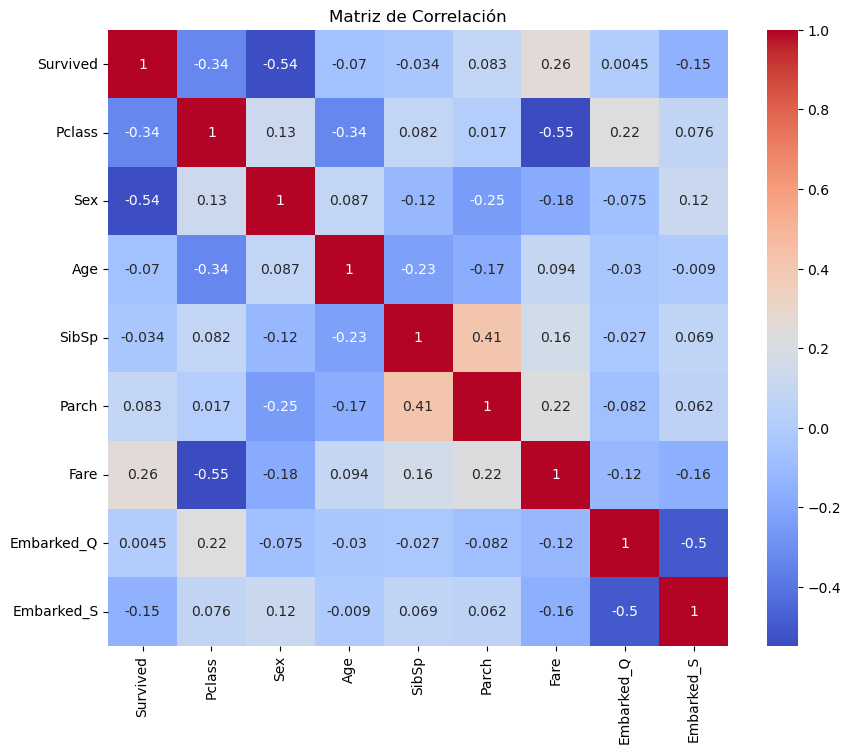

In [13]:
#Análisis de correlación

import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr_matrix = data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

# Variables independientes y dependientes
X = data.drop('Survived', axis=1)
y = data['Survived']

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Puntajes de las características
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))


      Feature       Score
1         Sex  368.154732
0      Pclass  112.541402
5        Fare   61.838885
7  Embarked_S   20.914977
4       Parch    6.175462
2         Age    4.345372
3       SibSp    1.028978
6  Embarked_Q    0.018248


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Modelo base
model = LinearRegression()

# Aplicar RFE
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# Características seleccionadas
selected_features = X.columns[rfe.support_]
print("Características seleccionadas por RFE:")
print(selected_features)


Características seleccionadas por RFE:
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked_S'], dtype='object')


In [19]:
from sklearn.tree import DecisionTreeClassifier

# Modelo de árbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

# Importancia de características
importances = tree_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))


      Feature  Importance
1         Sex    0.308922
5        Fare    0.239302
2         Age    0.226302
0      Pclass    0.117996
3       SibSp    0.046915
4       Parch    0.032905
7  Embarked_S    0.016686
6  Embarked_Q    0.010973


In [22]:
# Lista de características finales
final_features = ['Sex', 'Pclass', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']

# Actualizar variables independientes
X = data[final_features]

# Verificar dimensiones
print("\nDimensiones de X después de la selección de características:")
print(X.shape)



Dimensiones de X después de la selección de características:
(889, 6)


In [24]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

from sklearn.model_selection import train_test_split

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print("\nDimensiones del conjunto de prueba:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Dimensiones del conjunto de entrenamiento:
X_train: (711, 6), y_train: (711,)

Dimensiones del conjunto de prueba:
X_test: (178, 6), y_test: (178,)


In [26]:
#5. Entrenar el Modelo de Regresión Lineal

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Evaluación del Modelo:")
print(f"MSE (Train): {mse_train:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"R^2 (Train): {r2_train:.4f}")
print(f"R^2 (Test): {r2_test:.4f}")


Evaluación del Modelo:
MSE (Train): 0.1450
MSE (Test): 0.1463
R^2 (Train): 0.3854
R^2 (Test): 0.3837


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Definir los hiperparámetros para ajustar
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='accuracy',  # Métrica de evaluación
    verbose=1,
    n_jobs=-1
)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:")
print(grid_search.best_params_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Mejores hiperparámetros:
{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    s

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_test = best_model.predict(X_test)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.4f}")

# Mostrar el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_test))


Precisión del modelo en el conjunto de prueba: 0.7865

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       109
           1       0.73      0.71      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178


Matriz de confusión:
[[91 18]
 [20 49]]


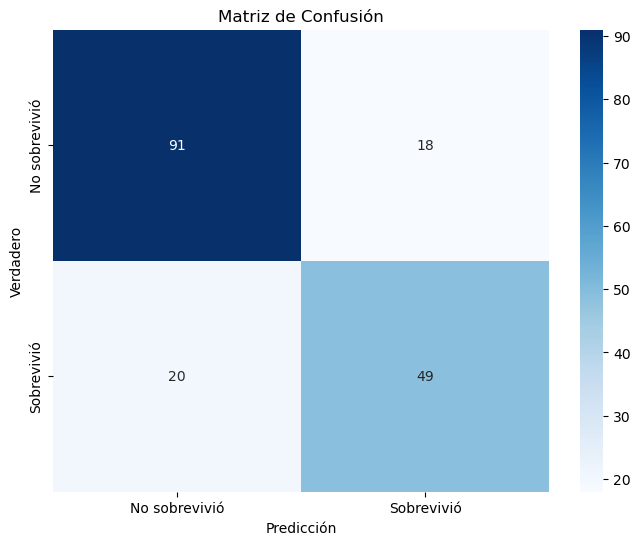

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()
